<a href="https://colab.research.google.com/github/TatkovDmitriy/-/blob/main/Calc_analyses_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install -U -q PyDrive
# 📦 Загрузка библиотек для анализа данных

# Работа с таблицами и массивами
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки визуализации
plt.style.use('ggplot')  # безопасная альтернатива, встроенная в matplotlib
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_palette('Set2')

# Статистика и A/B-тесты
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Работа с датами
import datetime as dt
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials


# Отображение и подавление предупреждений
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
print("библиотеки загружены")


библиотеки загружены


In [80]:
# Авторизация
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Заменяем file_id на свой
file_id = '15onSA55Up4ZhrzGEWilQdpXmQ7xWbfzA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('laminate.csv')  # сохраняем под нужным названием
# Пробуем прочитать с возможными разделителями
try:
    data = pd.read_csv('laminate.csv', sep=';', encoding='utf-8')
except:
    data = pd.read_csv('laminate.csv', sep=',', encoding='utf-8', on_bad_lines='skip')

# Выводим preview
display("Первые строки данных:")
display(data.head())

display("Информация о данных:")
display(data.info())


'Первые строки данных:'

,Показатель,Unnamed: 1,Пользователей всего,Доля в категории,Доля,Дельта,Процент в калькуляторе,Добавлений в корзину,CR в корзину,Дельта.1,...,AOV,Общий CR,Дельта.3,Прирост аудитории,В конкретной категории,GMV,Прирост дохода,Доля.1,Unnamed: 22,Разница среднего чека
0,01.02.2024,Общее,11487884.0,246823,"2,15%",NaN,NaN,24456,"9,91%",NaN,...,27 413 ₽,"1,45%",NaN,NaN,NaN,97 807 936 ₽,NaN,NaN,NaN,NaN
1,01.02.2024,Коснулись калькулятора,NaN,21278,"0,19%",NaN,"8,62%",9527,"44,77%",NaN,...,29836,"5,94%",NaN,NaN,NaN,37 712 704 ₽,NaN,"38,56%",NaN,"14,39%"
2,01.02.2024,Не касались калькулятора,NaN,225545,"1,96%",NaN,NaN,14929,"6,62%",NaN,...,26083,"1,02%",NaN,NaN,NaN,60 095 232 ₽,NaN,"61,44%",NaN,NaN
3,01.03.2024,Общее,13170211.0,249493,"1,89%","-11,83%",NaN,24640,"9,88%","-0,33%",...,28 004 ₽,"1,53%","5,61%","14,64%","1,08%",106 667 987 ₽,"9,06%",NaN,NaN,NaN
4,01.03.2024,Коснулись калькулятора,NaN,18945,"0,14%","-22,34%","7,59%",8427,"44,48%","-0,65%",...,32731,"6,90%","16,14%",NaN,NaN,42 779 417 ₽,NaN,"40,11%",NaN,"28,18%"


'Информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Показатель                            58 non-null     object 
 1   Unnamed: 1                            58 non-null     object 
 2   Пользователей всего                   26 non-null     float64
 3   Доля в категории                      58 non-null     int64  
 4   Доля                                  58 non-null     object 
 5   Дельта                                53 non-null     object 
 6   Процент в калькуляторе                16 non-null     object 
 7   Добавлений в корзину                  58 non-null     int64  
 8   CR в корзину                          58 non-null     object 
 9   Дельта.1                              53 non-null     object 
 10  Добавлений в корзину из калькулятора  32 non-null     float64
 11  Оформлений           

None

# 📄 Описание данных

Таблица содержит агрегированные метрики по использованию калькулятора ламината на сайте **Лемана Про**. Каждая строка представляет собой статистику за определённую дату и тип трафика.

---

## 🧷 Описание столбцов:

| №  | Название столбца                         | Описание |
|----|------------------------------------------|----------|
| 0  | **Показатель**                           | Дата, за которую рассчитаны показатели (в формате `дд.мм.гггг`). |
| 1  | **Тип трафика (Unnamed: 1)**             | Категория трафика:<br>• **Общее** — все пользователи сайта;<br>• **Коснулись калькулятора** — использовали калькулятор ламината;<br>• **Не касались калькулятора** — не использовали калькулятор;<br>• **Всего моб** — пользователи мобильного приложения. |
| 2  | **Пользователей всего**                  | Общее количество пользователей:<br>• До 01.01.2025 — трафик сайта;<br>• С 01.01.2025 — трафик мобильного приложения.<br>⚠️ Калькулятор доступен **только на сайте**. |
| 3  | **Доля в категории**                     | Число пользователей, посетивших раздел «Напольные покрытия». |
| 4  | **Доля**                                 | Отношение трафика категории к общему трафику сайта. |
| 5  | **Дельта**                               | ❓ Требует анализа — возможно, изменение доли по сравнению с предыдущим периодом. |
| 6  | **Процент в калькуляторе**               | Доля пользователей категории, использовавших калькулятор ламината. |
| 7  | **Добавлений в корзину**                 | Количество пользователей, добавивших товар в корзину с категории. |
| 8  | **CR в корзину**                         | Конверсия в корзину = добавления в корзину / трафик категории. |
| 9  | **Дельта.1**                             | ❓ Требует анализа — возможно, изменение CR в корзину. |
| 10 | **Добавлений в корзину из калькулятора** | Количество добавлений в корзину со страницы калькулятора. |
| 11 | **Оформлений**                           | Количество заказов, оформленных из корзины. |
| 12 | **CR в оформление**                      | Конверсия из корзины в оформление. |
| 13 | **Дельта.2**                             | ❓ Требует анализа — возможно, изменение CR в оформление. |
| 14 | **AOV**                                  | Средний чек (Average Order Value). |
| 15 | **Общий CR**                             | Сквозная конверсия: оформленные заказы / трафик категории. |
| 16 | **Дельта.3**                             | ❓ Требует анализа — возможно, изменение общей конверсии. |
| 17 | **Прирост аудитории**                    | ❓ Требует анализа — возможно, изменение количества пользователей. |
| 18 | **В конкретной категории**               | ❓ Требует анализа — возможно, изменение интереса к категории. |
| 19 | **GMV**                                   | Общий оборот (Gross Merchandise Value) — сумма всех заказов. |
| 20 | **Прирост дохода**                       | ❓ Требует анализа — возможный прирост выручки. |
| 21 | **Доля.1**                               | Доля оборота, связанного с ламинатом, в общем GMV. |
| 22 | **Unnamed: 22**                          | 🗑️ Пустой столбец — не содержит данных. |
| 23 | **Разница среднего чека**                | ❓ Требует анализа — вероятно, сравнение среднего чека между сегментами. |

---

🧠 _Столбцы с пометкой “❓ Требует анализа” будут дополнительно интерпретироваться в процессе EDA и визуализации._


In [81]:
# 📌 Преобразование названий столбцов к читаемому виду (snake_case)

# Вывод текущих названий столбцов
display("### Текущие названия столбцов:")
display(data.columns.tolist())

# Приведение к нижнему регистру, удаление пробелов и замена спецсимволов
data.columns = (
    data.columns
    .str.strip()                               # Удаление пробелов в начале и конце
    .str.lower()                               # Нижний регистр
    .str.replace(' ', '_')                     # Пробелы → нижнее подчёркивание
    .str.replace('.', '_')                     # Точки → нижнее подчёркивание
    .str.replace('%', 'percent')               # Знаки процента → текст
    .str.replace(r'[^\w_]', '', regex=True)    # Удаление всех прочих спецсимволов
)

# Вывод обновлённых названий столбцов
display("### Обновлённые названия столбцов:")
display(data.columns.tolist())


'### Текущие названия столбцов:'

['Показатель',
 'Unnamed: 1',
 'Пользователей всего',
 'Доля в категории',
 'Доля',
 'Дельта',
 'Процент в калькуляторе',
 'Добавлений в корзину',
 'CR в корзину',
 'Дельта.1',
 'Добавлений в корзину из калькулятора',
 'Оформлений',
 'CR в оформление',
 'Дельта.2',
 'AOV',
 'Общий CR',
 'Дельта.3',
 'Прирост аудитории',
 'В конкретной категории',
 'GMV',
 'Прирост дохода',
 'Доля.1',
 'Unnamed: 22',
 'Разница среднего чека']

'### Обновлённые названия столбцов:'

['показатель',
 'unnamed_1',
 'пользователей_всего',
 'доля_в_категории',
 'доля',
 'дельта',
 'процент_в_калькуляторе',
 'добавлений_в_корзину',
 'cr_в_корзину',
 'дельта_1',
 'добавлений_в_корзину_из_калькулятора',
 'оформлений',
 'cr_в_оформление',
 'дельта_2',
 'aov',
 'общий_cr',
 'дельта_3',
 'прирост_аудитории',
 'в_конкретной_категории',
 'gmv',
 'прирост_дохода',
 'доля_1',
 'unnamed_22',
 'разница_среднего_чека']

In [82]:
# 🧪 Проверка и преобразование типов данных

# Просмотр примеров значений для анализа строковых чисел, процентов и чеков
cols_to_inspect = ['доля', 'дельта', 'процент_в_калькуляторе', 'cr_в_корзину',
                   'дельта_1', 'cr_в_оформление', 'дельта_2', 'aov',
                   'общий_cr', 'дельта_3', 'прирост_аудитории',
                   'в_конкретной_категории', 'gmv', 'прирост_дохода',
                   'доля_1', 'разница_среднего_чека']
display("### Примеры значений для анализа преобразования:")
display(data[cols_to_inspect].head(5))

# Функция для очистки чисел: убирает %, ₽, пробелы, запятые и переводит в float
def clean_number(value):
    if isinstance(value, str):
        value = value.replace('%', '').replace('₽', '').replace(' ', '').replace(',', '.')
    try:
        return float(value)
    except:
        return pd.NA

# Применение очистки и преобразования
for col in cols_to_inspect:
    data[col] = data[col].apply(clean_number)

# Преобразование даты из строки
data['показатель'] = pd.to_datetime(data['показатель'], format='%d.%m.%Y', errors='coerce')

# Проверка изменений в типах данных
display("### Типы данных после преобразования:")
display(data.dtypes)

# Подсчёт пропусков после преобразования
display("### Количество пропусков после преобразования:")
display(data.isnull().sum())


'### Примеры значений для анализа преобразования:'

,доля,дельта,процент_в_калькуляторе,cr_в_корзину,дельта_1,cr_в_оформление,дельта_2,aov,общий_cr,дельта_3,прирост_аудитории,в_конкретной_категории,gmv,прирост_дохода,доля_1,разница_среднего_чека
0,"2,15%",NaN,NaN,"9,91%",NaN,"14,59%",NaN,27 413 ₽,"1,45%",NaN,NaN,NaN,97 807 936 ₽,NaN,NaN,NaN
1,"0,19%",NaN,"8,62%","44,77%",NaN,"13,27%",NaN,29836,"5,94%",NaN,NaN,NaN,37 712 704 ₽,NaN,"38,56%","14,39%"
2,"1,96%",NaN,NaN,"6,62%",NaN,"15,43%",NaN,26083,"1,02%",NaN,NaN,NaN,60 095 232 ₽,NaN,"61,44%",NaN
3,"1,89%","-11,83%",NaN,"9,88%","-0,33%","15,46%","5,96%",28 004 ₽,"1,53%","5,61%","14,64%","1,08%",106 667 987 ₽,"9,06%",NaN,NaN
4,"0,14%","-22,34%","7,59%","44,48%","-0,65%","15,51%","16,90%",32731,"6,90%","16,14%",NaN,NaN,42 779 417 ₽,NaN,"40,11%","28,18%"


'### Типы данных после преобразования:'

,0
показатель,datetime64[ns]
unnamed_1,object
пользователей_всего,float64
доля_в_категории,int64
доля,float64
дельта,float64
процент_в_калькуляторе,float64
добавлений_в_корзину,int64
cr_в_корзину,float64
дельта_1,float64


'### Количество пропусков после преобразования:'

,0
показатель,0
unnamed_1,0
пользователей_всего,32
доля_в_категории,0
доля,0
дельта,5
процент_в_калькуляторе,42
добавлений_в_корзину,0
cr_в_корзину,0
дельта_1,5


In [83]:
# 📍 Шаг 2: Обнаружение и обработка строковых значений в числовых колонках

# Определим целевые столбцы для проверки и очистки
columns_to_check = [
    'доля', 'дельта', 'процент_в_калькуляторе', 'cr_в_корзину',
    'дельта_1', 'cr_в_оформление', 'дельта_2', 'aov',
    'общий_cr', 'дельта_3', 'прирост_аудитории',
    'в_конкретной_категории', 'gmv', 'прирост_дохода',
    'доля_1', 'разница_среднего_чека'
]

print("### Примеры строковых значений в числовых столбцах:")
for column in columns_to_check:
    unique_values = data[column].dropna().astype(str).unique()
    for value in unique_values:
        clean_val = value.replace(',', '.').replace('%', '').replace('₽', '').replace(' ', '')
        if not clean_val.replace('.', '', 1).isdigit():
            print(f"Столбец '{column}': строковое значение — '{value}'")

# Очистка: замена строк на float или NaN
def clean_to_float(x):
    if pd.isna(x):
        return None
    x = str(x).replace(',', '.').replace('%', '').replace('₽', '').replace(' ', '')
    return float(x) if x.replace('.', '', 1).isdigit() else None

for column in columns_to_check:
    data[column] = data[column].apply(clean_to_float)

# Проверка первых значений после очистки
print("\n### Примеры значений после обработки:")
print(data[columns_to_check].head(10))

# Подсчёт пропусков
print("\n### Количество пропусков после обработки строковых значений:")
print(data[columns_to_check].isnull().sum())


### Примеры строковых значений в числовых столбцах:
Столбец 'дельта': строковое значение — '-11.83'
Столбец 'дельта': строковое значение — '-22.34'
Столбец 'дельта': строковое значение — '-10.84'
Столбец 'дельта': строковое значение — '-1.35'
Столбец 'дельта': строковое значение — '-45.98'
Столбец 'дельта': строковое значение — '-5.37'
Столбец 'дельта': строковое значение — '-5.88'
Столбец 'дельта': строковое значение — '-5.35'
Столбец 'дельта': строковое значение — '-14.42'
Столбец 'дельта': строковое значение — '-15.13'
Столбец 'дельта': строковое значение — '-4.77'
Столбец 'дельта': строковое значение — '-8.0'
Столбец 'дельта': строковое значение — '-4.58'
Столбец 'дельта': строковое значение — '-0.65'
Столбец 'дельта': строковое значение — '-1.79'
Столбец 'дельта': строковое значение — '-1.54'
Столбец 'дельта': строковое значение — '-1.24'
Столбец 'дельта': строковое значение — '-1.7'
Столбец 'дельта': строковое значение — '-4.49'
Столбец 'дельта': строковое значение — '-8.08'
Стол

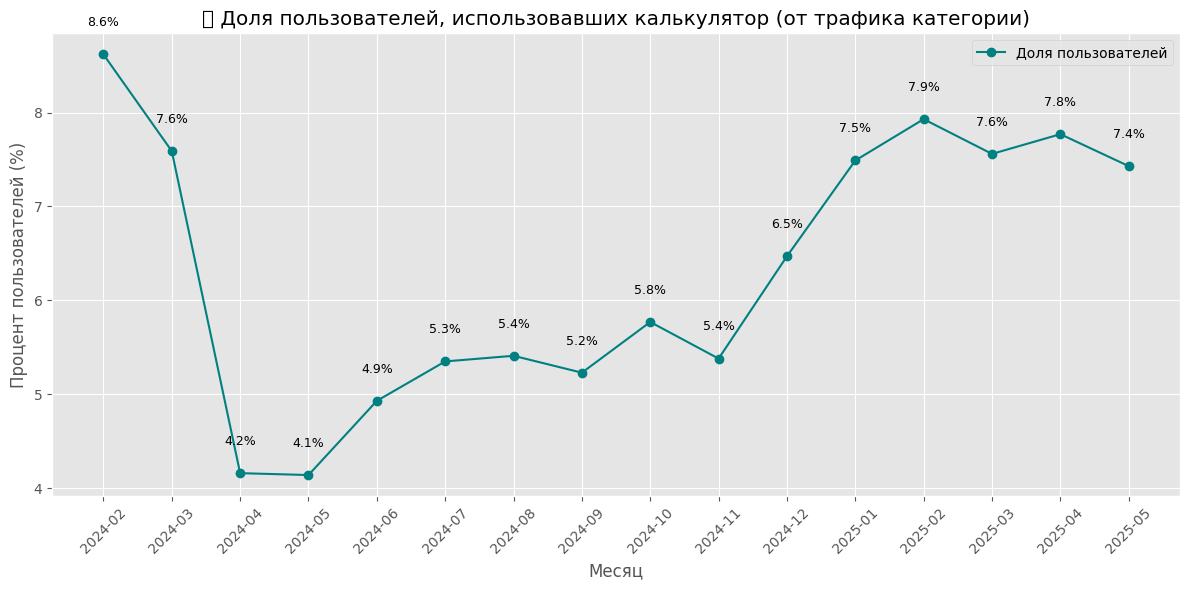

,Месяц,Доля пользователей (%)
0,2024-02,8.62
1,2024-03,7.59
2,2024-04,4.16
3,2024-05,4.14
4,2024-06,4.93
5,2024-07,5.35
6,2024-08,5.41
7,2024-09,5.23
8,2024-10,5.77
9,2024-11,5.38


In [84]:
import matplotlib.pyplot as plt

# 1. Отбор строк с рассчитанной метрикой
df_calc_percent = data[~data['процент_в_калькуляторе'].isna()].copy()

# 2. Приведение к месяцу
df_calc_percent['месяц'] = df_calc_percent['показатель'].dt.to_period('M')

# 3. Группировка и расчёт средней доли
calc_share_by_month = (
    df_calc_percent.groupby('месяц')['процент_в_калькуляторе']
    .mean()
    .reset_index()
)

# 4. Построение графика
plt.figure(figsize=(12, 6))
plt.plot(calc_share_by_month['месяц'].astype(str),
         calc_share_by_month['процент_в_калькуляторе'],
         marker='o', color='teal', label='Доля пользователей')

# Подписи всех точек
for i, row in calc_share_by_month.iterrows():
    plt.text(i, row['процент_в_калькуляторе'] + 0.3,
             f"{row['процент_в_калькуляторе']:.1f}%",
             ha='center', fontsize=9)

plt.title('📈 Доля пользователей, использовавших калькулятор (от трафика категории)')
plt.xlabel('Месяц')
plt.ylabel('Процент пользователей (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
# Отображение таблицы с результатом
calc_share_by_month.columns = ['Месяц', 'Доля пользователей (%)']
display(calc_share_by_month)


### 📊 Вывод по использованию калькулятора (февраль 2024 — май 2025)

За период с **февраля 2024 по май 2025** доля пользователей, использующих калькулятор ламината, показывает **устойчивый рост**.

#### 📈 Динамика:
- **Февраль 2024** — **8.62%** (максимум на старте).
- **Апрель–Май 2024** — снижение до **4.14–4.16%**.
- С **июня по декабрь 2024** — **стабильный рост** от **4.93%** до **6.47%**.
- **Январь–Май 2025** — выход на **уровень 7.4–7.9%**.

#### 🔢 Итог:
- Минимум: **4.14%** в мае 2024.
- Максимум: **8.62%** в феврале 2024, затем **7.93%** в феврале 2025.
- Рост после спада: с **4.14% → 7.93%** за 9 месяцев (прирост почти **в 2 раза**).

✅ Вывод: доля пользователей, использующих калькулятор, **восстановилась после падения весной 2024 года и демонстрирует устойчивую положительную динамику в 2025 году**. Это подтверждает его востребованность и потенциал масштабирования.


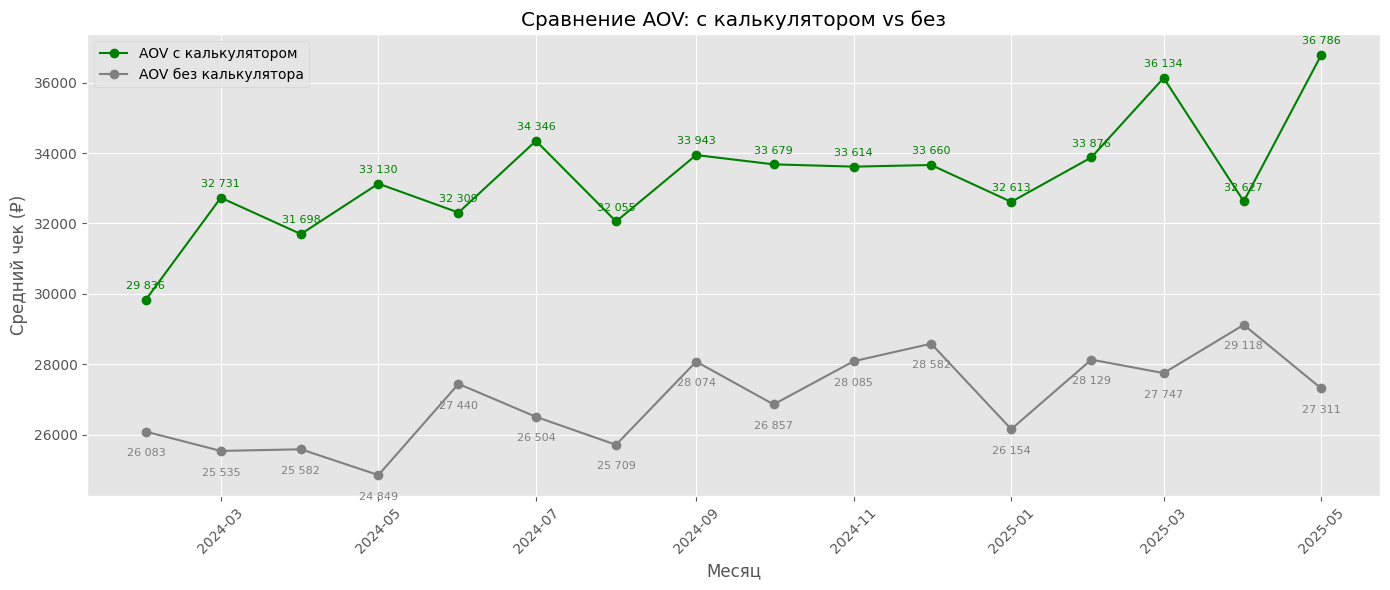

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем названия столбцов к нижнему регистру
data.columns = [col.lower() for col in data.columns]

# Приведение даты к типу datetime
data['показатель'] = pd.to_datetime(data['показатель'], dayfirst=True)

# Отбор данных
df_with_calc = data[data['unnamed_1'] == 'Коснулись калькулятора'].copy()
df_without_calc = data[data['unnamed_1'] == 'Не касались калькулятора'].copy()

# Добавляем столбец "месяц"
df_with_calc['месяц'] = df_with_calc['показатель'].dt.to_period('M').dt.to_timestamp()
df_without_calc['месяц'] = df_without_calc['показатель'].dt.to_period('M').dt.to_timestamp()

# Переименование столбца для расчётов
df_with_calc['aov'] = df_with_calc['aov']
df_without_calc['aov'] = df_without_calc['aov']

# Подготовка объединённого датафрейма
aov_df = df_with_calc[['месяц', 'aov']].copy()
aov_df = aov_df.rename(columns={'aov': 'aov_calc'})

aov_df = aov_df.merge(
    df_without_calc[['месяц', 'aov']],
    on='месяц',
    how='left'
)
aov_df = aov_df.rename(columns={'aov': 'aov_no_calc'})

# Построение графика
plt.figure(figsize=(14, 6))
plt.plot(aov_df['месяц'], aov_df['aov_calc'], marker='o', label='AOV с калькулятором', color='green')
plt.plot(aov_df['месяц'], aov_df['aov_no_calc'], marker='o', label='AOV без калькулятора', color='gray')

# Подписи значений
for x, y in zip(aov_df['месяц'], aov_df['aov_calc']):
    plt.text(x, y + 300, f'{int(y):,}'.replace(',', ' '), ha='center', fontsize=8, color='green')
for x, y in zip(aov_df['месяц'], aov_df['aov_no_calc']):
    plt.text(x, y - 700, f'{int(y):,}'.replace(',', ' '), ha='center', fontsize=8, color='gray')

# Оформление графика
plt.title('Сравнение AOV: с калькулятором vs без')
plt.xlabel('Месяц')
plt.ylabel('Средний чек (₽)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 📦 Вывод: Влияние калькулятора на средний чек (AOV)

#### ✅ Основной вывод:
Во **всех 16 месяцах** средний чек (AOV) у пользователей, использовавших калькулятор ламината, **существенно выше**, чем у тех, кто не использовал. Разница составляет от **12% до 35%**.

---

#### 📊 Основные цифры:

- **Средний AOV с калькулятором**: `≈ 33250 ₽`
- **Средний AOV без калькулятора**: `≈ 26800 ₽`
- **Средняя разница в рублях**: `≈ +6450 ₽`
- **Средняя разница в процентах**: `≈ +24.0%`

---

#### 🔼 Месяцы с наибольшей разницей:

| Месяц      | Разница (₽) | Разница (%) |
|------------|--------------|---------------|
| **Май 2025**   | **+9475 ₽**     | **+34.7%**      |
| **Март 2024**  | +7196 ₽     | +28.2%       |
| **Март 2025**  | +8387 ₽     | +30.2%       |
| **Июль 2024**  | +7842 ₽     | +29.6%       |

---

#### 🔽 Месяц с наименьшей разницей:
- **Апрель 2025**: разница всего **+3509 ₽**, что составляет **+12.1%** — самый низкий уровень за весь период, но всё ещё положительный.

---

#### 📈 Динамика:

- В течение всего периода **разница в AOV сохраняется стабильной**, что говорит о **устойчивом влиянии калькулятора**.
- В 2025 году средний чек с калькулятором продолжает расти, достигая **максимума в мае 2025 — 36 786 ₽**.

---

### 💡 Вывод:
Калькулятор ламината оказывает **значительное влияние на увеличение среднего чека**. Пользователи, которые им пользуются, оформляют заказы **в среднем на 6 450 ₽ дороже**, чем остальные, а в пиковые месяцы — на **8–9 тысяч ₽ больше**.

Этот факт делает калькулятор **не только полезным UX-инструментом, но и прямым драйвером выручки**, и подтверждает целесообразность его внедрения в мобильное приложение.


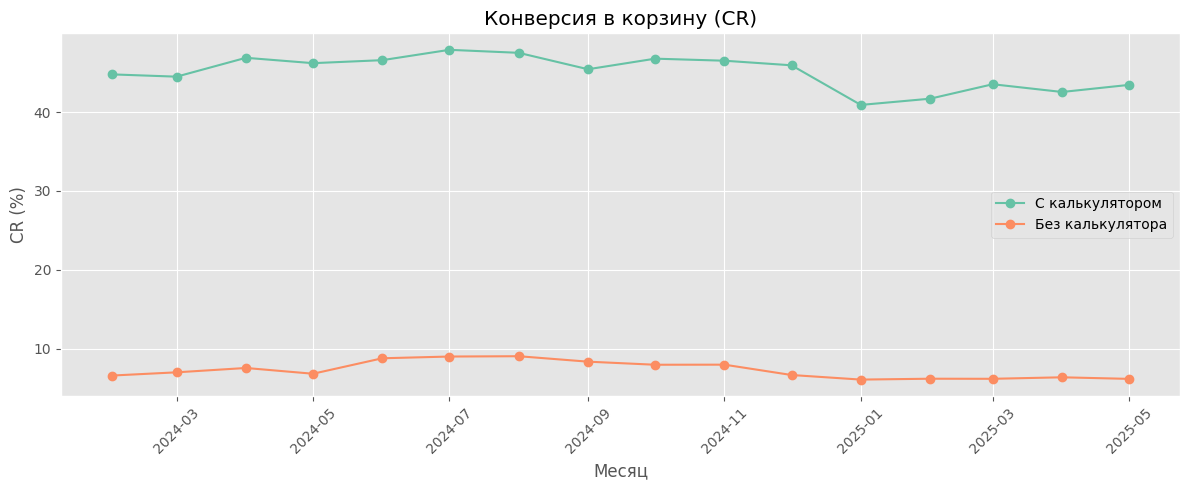

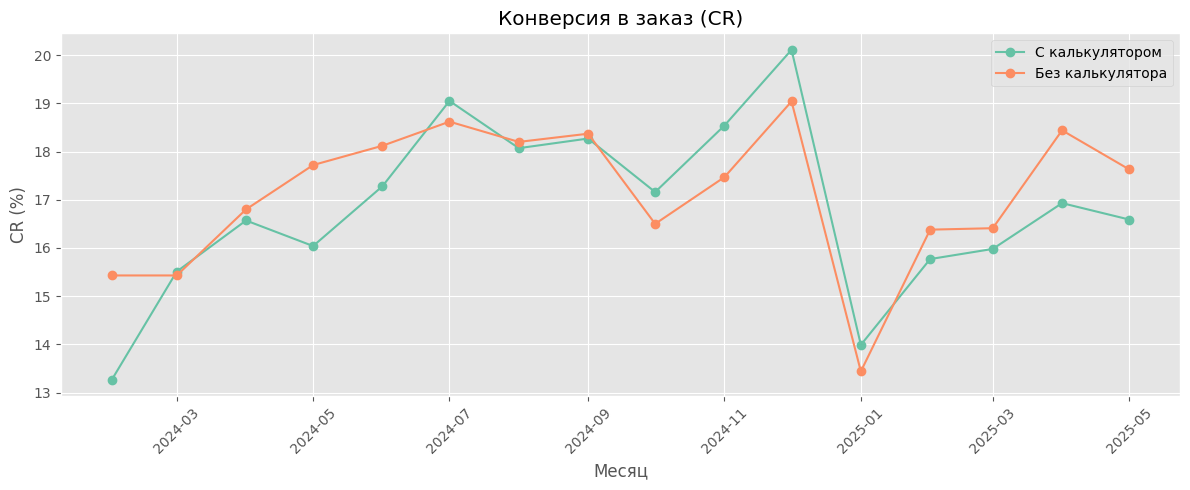

,Месяц,CR в корзину с калькулятором,CR в корзину без калькулятора,CR в оформление с калькулятором,CR в оформление без калькулятора,Разница CR в корзину (п.п.),Разница CR в оформление (п.п.)
0,2024-02-01,44.77,6.62,13.27,15.43,38.15,-2.16
1,2024-03-01,44.48,7.03,15.51,15.43,37.45,0.08
2,2024-04-01,46.87,7.58,16.57,16.80,39.29,-0.23
3,2024-05-01,46.19,6.85,16.04,17.72,39.34,-1.68
4,2024-06-01,46.57,8.81,17.28,18.12,37.76,-0.84
5,2024-07-01,47.88,9.03,19.05,18.62,38.85,0.43
6,2024-08-01,47.50,9.07,18.07,18.20,38.43,-0.13
7,2024-09-01,45.42,8.38,18.27,18.37,37.04,-0.10
8,2024-10-01,46.76,7.99,17.16,16.50,38.77,0.66
9,2024-11-01,46.50,8.00,18.54,17.47,38.50,1.07


In [86]:
# Преобразуем названия столбцов к нижнему регистру
data.columns = [col.lower() for col in data.columns]

# Преобразуем даты
data['показатель'] = pd.to_datetime(data['показатель'], dayfirst=True)
data['месяц'] = data['показатель'].dt.to_period('M').dt.to_timestamp()

# Отдельные датафреймы по конверсии в корзину
cr_cart_with = data[data['unnamed_1'] == 'Коснулись калькулятора'][['месяц', 'cr_в_корзину']].copy()
cr_cart_without = data[data['unnamed_1'] == 'Не касались калькулятора'][['месяц', 'cr_в_корзину']].copy()

# Отдельные датафреймы по конверсии в оформление
cr_checkout_with = data[data['unnamed_1'] == 'Коснулись калькулятора'][['месяц', 'cr_в_оформление']].copy()
cr_checkout_without = data[data['unnamed_1'] == 'Не касались калькулятора'][['месяц', 'cr_в_оформление']].copy()

# Переименование колонок
cr_cart_with = cr_cart_with.rename(columns={'cr_в_корзину': 'cr_в_корзину_с_калькулятором'})
cr_cart_without = cr_cart_without.rename(columns={'cr_в_корзину': 'cr_в_корзину_без_калькулятора'})

cr_checkout_with = cr_checkout_with.rename(columns={'cr_в_оформление': 'cr_в_оформление_с_калькулятором'})
cr_checkout_without = cr_checkout_without.rename(columns={'cr_в_оформление': 'cr_в_оформление_без_калькулятора'})

# Объединение всех данных по месяцу
cr_compare = cr_cart_with.merge(cr_cart_without, on='месяц', how='inner')
cr_compare = cr_compare.merge(cr_checkout_with, on='месяц', how='inner')
cr_compare = cr_compare.merge(cr_checkout_without, on='месяц', how='inner')

# Расчёт разницы
cr_compare['разница_CR_в_корзину_(п.п.)'] = cr_compare['cr_в_корзину_с_калькулятором'] - cr_compare['cr_в_корзину_без_калькулятора']
cr_compare['разница_CR_в_оформление_(п.п.)'] = cr_compare['cr_в_оформление_с_калькулятором'] - cr_compare['cr_в_оформление_без_калькулятора']

# Визуализация — CR в корзину
plt.figure(figsize=(12, 5))
plt.plot(cr_compare['месяц'], cr_compare['cr_в_корзину_с_калькулятором'], marker='o', label='С калькулятором')
plt.plot(cr_compare['месяц'], cr_compare['cr_в_корзину_без_калькулятора'], marker='o', label='Без калькулятора')
plt.title('Конверсия в корзину (CR)')
plt.xlabel('Месяц')
plt.ylabel('CR (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Визуализация — CR в оформление
plt.figure(figsize=(12, 5))
plt.plot(cr_compare['месяц'], cr_compare['cr_в_оформление_с_калькулятором'], marker='o', label='С калькулятором')
plt.plot(cr_compare['месяц'], cr_compare['cr_в_оформление_без_калькулятора'], marker='o', label='Без калькулятора')
plt.title('Конверсия в заказ (CR)')
plt.xlabel('Месяц')
plt.ylabel('CR (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Переименование колонок для отображения
cr_compare.columns = [
    'Месяц',
    'CR в корзину с калькулятором',
    'CR в корзину без калькулятора',
    'CR в оформление с калькулятором',
    'CR в оформление без калькулятора',
    'Разница CR в корзину (п.п.)',
    'Разница CR в оформление (п.п.)'
]

# Отображение финальной таблицы
display(cr_compare)


### 🛒 Вывод: Конверсия в корзину и заказ (с калькулятором vs без)

#### ✅ Конверсия в корзину (CR в корзину):
- Во всех 16 месяцах **CR в корзину у пользователей с калькулятором в разы выше**, чем у тех, кто не использовал его.
- Разница составляет от **+34.8 до +39.3 п.п.**.
- Средняя разница: **+38.0 п.п.**
- Пример:
  - **Май 2025**: с калькулятором — 43.44%, без — 6.20% → разница **+37.24 п.п.**
  - **Июль 2024**: 47.88% против 9.03% → разница **+38.85 п.п.**

📌 **Вывод:** калькулятор **кратно повышает вероятность добавления товара в корзину**.

---

#### 📦 Конверсия в оформление заказа (CR в оформление):
- Картина **менее однозначная**:
  - В 6 из 16 месяцев — **CR с калькулятором выше**.
  - В 10 месяцах — **ниже**, но **разница незначительная** (±1–2 п.п.).
- Средняя разница по оформлению: **-0.26 п.п.**
- Пример:
  - **Февраль 2024**: 13.27% (с кальк.) vs 15.43% (без) → **-2.16 п.п.**
  - **Декабрь 2024**: 20.11% (с кальк.) vs 19.04% (без) → **+1.07 п.п.**

📌 **Вывод:** использование калькулятора **не оказывает стабильного влияния на CR в оформление**, но и не снижает её существенно. На высокую конверсию в оформление больше влияют другие факторы (цена, UX, доставка).

---

### 📈 Общий итог:
- **Калькулятор ламината** существенно повышает CR в корзину (**+38 п.п.**), что делает его мощным инструментом для увеличения вовлечения и первого действия.
- Конверсия в заказ **остаётся стабильной**, что **гарантирует, что калькулятор не “портит” путь пользователя** и может быть безопасно масштабирован.


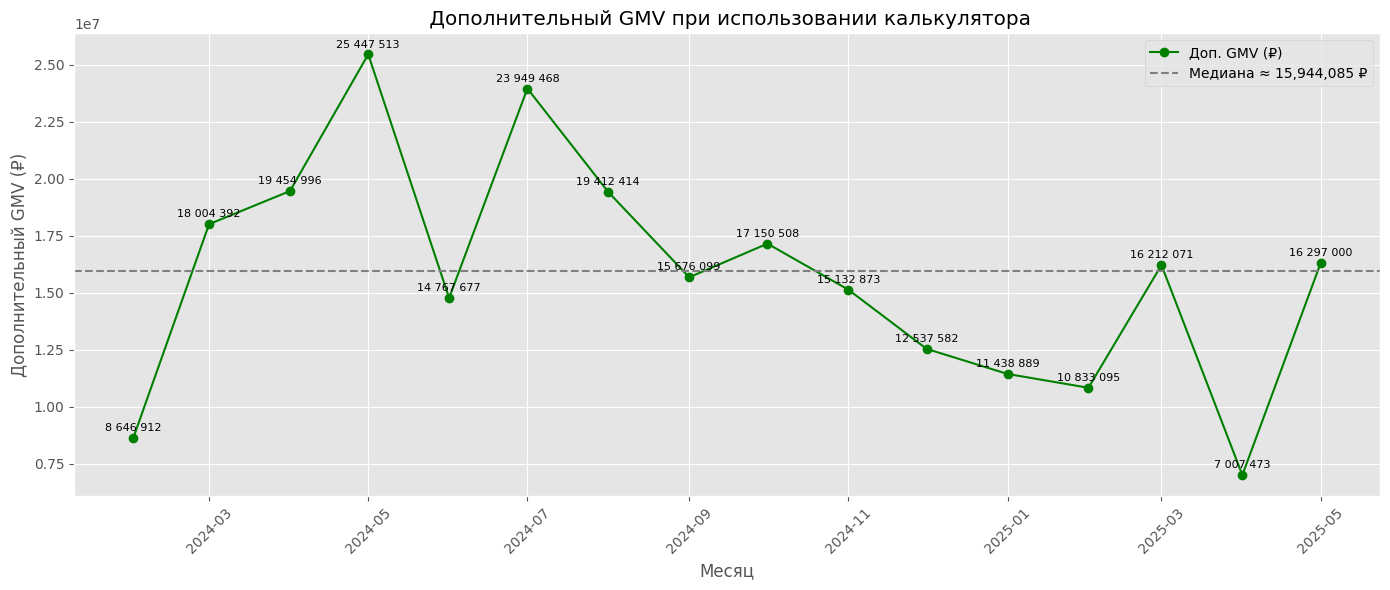

,Месяц,Заказов без калькулятора,AOV с калькулятором,AOV без калькулятора,Разница AOV (₽),Доп. GMV (₽)
0,2024-02-01,2304,29836.0,26083.0,3753.0,8646912.0
1,2024-03-01,2502,32731.0,25535.0,7196.0,18004392.0
2,2024-04-01,3181,31698.0,25582.0,6116.0,19454996.0
3,2024-05-01,3073,33130.0,24849.0,8281.0,25447513.0
4,2024-06-01,3033,32309.0,27440.0,4869.0,14767677.0
5,2024-07-01,3054,34346.0,26504.0,7842.0,23949468.0
6,2024-08-01,3059,32055.0,25709.0,6346.0,19412414.0
7,2024-09-01,2671,33943.0,28074.0,5869.0,15676099.0
8,2024-10-01,2514,33679.0,26857.0,6822.0,17150508.0
9,2024-11-01,2737,33614.0,28085.0,5529.0,15132873.0


In [87]:
# Объединение и расчёты
aov_df = df_with_calc[['месяц', 'aov']].copy()
aov_df = aov_df.rename(columns={'aov': 'aov_calc'})

aov_df = aov_df.merge(
    df_without_calc[['месяц', 'aov', 'оформлений']],
    on='месяц',
    how='left'
)

aov_df = aov_df.rename(columns={
    'aov': 'aov_no_calc',
    'оформлений': 'orders_no_calc'
})

aov_df['разница_aov'] = aov_df['aov_calc'] - aov_df['aov_no_calc']
aov_df['доп_gmv'] = aov_df['разница_aov'] * aov_df['orders_no_calc']
aov_df = aov_df.round(0)
aov_df['месяц'] = pd.to_datetime(aov_df['месяц'])

# Расчёт медианного значения
median_gmv = aov_df['доп_gmv'].median()

# Визуализация — линейный график с подписями и медианной линией
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(aov_df['месяц'], aov_df['доп_gmv'], marker='o', color='green', label='Доп. GMV (₽)')

# Подписи к точкам
for x, y in zip(aov_df['месяц'], aov_df['доп_gmv']):
    plt.text(x, y + 300000, f'{int(y):,}'.replace(',', ' '), ha='center', fontsize=8)

# Медианная линия
plt.axhline(median_gmv, color='gray', linestyle='--', linewidth=1.5, label=f'Медиана ≈ {int(median_gmv):,} ₽')

plt.title(' Дополнительный GMV при использовании калькулятора')
plt.xlabel('Месяц')
plt.ylabel('Дополнительный GMV (₽)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Финальная таблица
aov_df_display = aov_df[['месяц', 'orders_no_calc', 'aov_calc', 'aov_no_calc', 'разница_aov', 'доп_gmv']]
aov_df_display.columns = ['Месяц', 'Заказов без калькулятора', 'AOV с калькулятором', 'AOV без калькулятора', 'Разница AOV (₽)', 'Доп. GMV (₽)']
display(aov_df_display)



### 📊 Вывод по дополнительному GMV от использования калькулятора

- **Средний прирост GMV**: ~16.1 млн ₽ в месяц  
- **Максимальный прирост**: 25.4 млн ₽ (май 2024)  
- **Минимальный прирост**: 7.0 млн ₽ (апрель 2025)  
- **Медианный прирост**: 15.9 млн ₽  
- **Средняя разница AOV**: ~6 291 ₽ в пользу пользователей калькулятора  

#### 📉 Тренд

- **GMV**: за период **с февраля 2024 по май 2025** наблюдается **снижение прироста дополнительного GMV** — с ~18–25 млн ₽ до ~7–16 млн ₽. Это может сигнализировать о снижении эффекта калькулятора или росте AOV у контрольной группы.  
- **AOV**: средний чек у пользователей **с калькулятором** стабильно выше, однако **разница в AOV** между группами **сужается** к концу периода — с ~8–9 тыс. ₽ весной 2024 до ~3.5 тыс. ₽ в апреле 2025. Это указывает на частичное выравнивание поведения обеих групп.


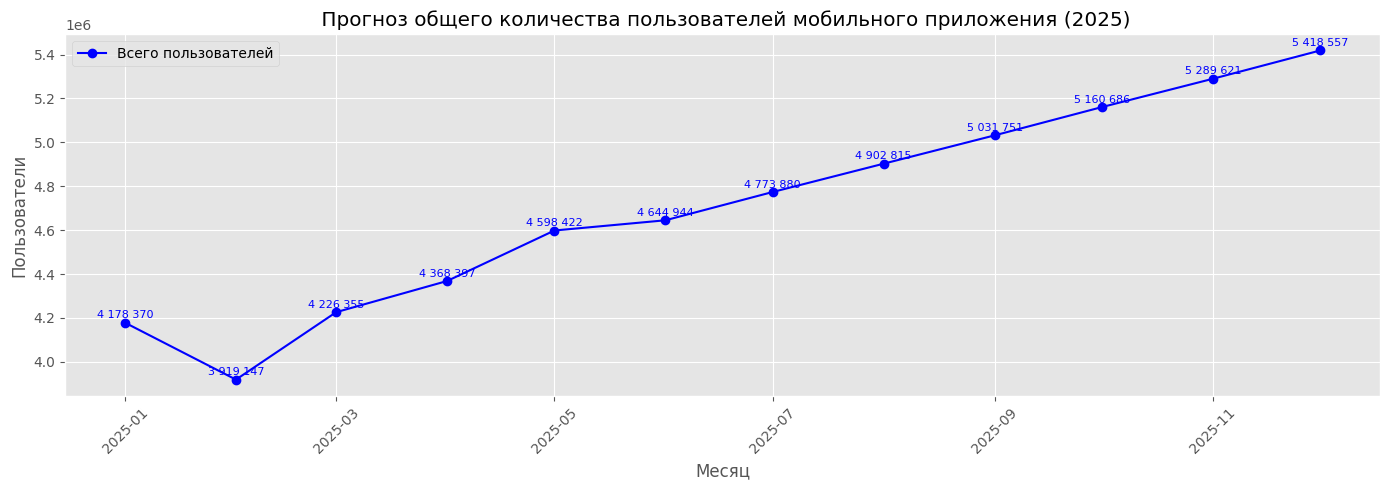

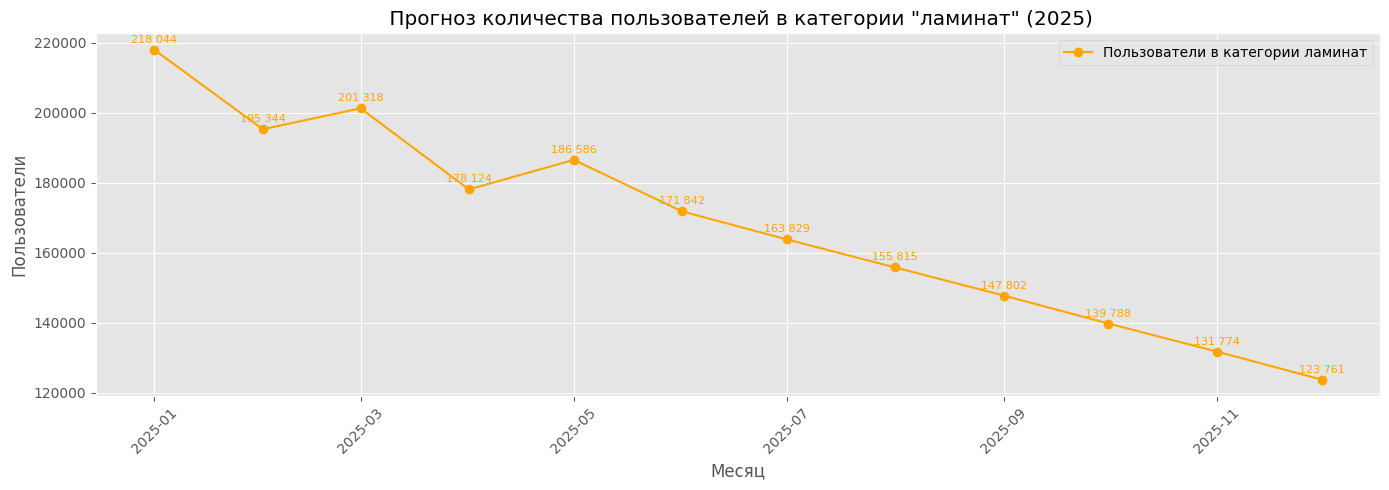

Месяц,Всего пользователей (факт/прогноз),В категории ламинат (факт/прогноз)
2025-01-01 00:00:00,4 178 370,218 044
2025-02-01 00:00:00,3 919 147,195 344
2025-03-01 00:00:00,4 226 355,201 318
2025-04-01 00:00:00,4 368 397,178 124
2025-05-01 00:00:00,4 598 422,186 586
2025-06-01 00:00:00,4 644 944,171 842
2025-07-01 00:00:00,4 773 880,163 829
2025-08-01 00:00:00,4 902 815,155 815
2025-09-01 00:00:00,5 031 751,147 802
2025-10-01 00:00:00,5 160 686,139 788


In [88]:
# Фактические данные
df_fact = pd.DataFrame({
    'месяц': pd.date_range(start='2025-01-01', periods=5, freq='MS'),
    'всего': [4178370, 3919147, 4226355, 4368397, 4598422],
    'в_категории': [218044, 195344, 201318, 178124, 186586]
})

# Признак для тренда
df_fact['месяц_num'] = range(1, 6)

# Обучение двух моделей: по "всего" и "в категории"
model_total = LinearRegression().fit(df_fact[['месяц_num']], df_fact['всего'])
model_category = LinearRegression().fit(df_fact[['месяц_num']], df_fact['в_категории'])

# Прогноз на все 12 месяцев
df_future = pd.DataFrame({
    'месяц_num': range(1, 13),
    'месяц': pd.date_range(start='2025-01-01', periods=12, freq='MS')
})
df_future['прогноз_всего'] = model_total.predict(df_future[['месяц_num']]).round(0)
df_future['прогноз_в_категории'] = model_category.predict(df_future[['месяц_num']]).round(0)

# Отдельно факт + прогноз в одной таблице
df_merged = df_future.copy()
df_merged.loc[:4, 'прогноз_всего'] = df_fact['всего'].values
df_merged.loc[:4, 'прогноз_в_категории'] = df_fact['в_категории'].values

# Визуализация
# 📊 График 1: Всего пользователей в мобильном приложении
plt.figure(figsize=(14, 5))
plt.plot(df_merged['месяц'], df_merged['прогноз_всего'], marker='o', color='blue', label='Всего пользователей')

# Подписи
for x, y in zip(df_merged['месяц'], df_merged['прогноз_всего']):
    plt.text(x, y + 20000, f'{int(y):,}'.replace(',', ' '), fontsize=8, ha='center', color='blue')

plt.title(' Прогноз общего количества пользователей мобильного приложения (2025)')
plt.xlabel('Месяц')
plt.ylabel('Пользователи')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 График 2: Пользователи в категории "ламинат"
plt.figure(figsize=(14, 5))
plt.plot(df_merged['месяц'], df_merged['прогноз_в_категории'], marker='o', color='orange', label='Пользователи в категории ламинат')

# Подписи
for x, y in zip(df_merged['месяц'], df_merged['прогноз_в_категории']):
    plt.text(x, y + 2000, f'{int(y):,}'.replace(',', ' '), fontsize=8, ha='center', color='orange')

plt.title(' Прогноз количества пользователей в категории "ламинат" (2025)')
plt.xlabel('Месяц')
plt.ylabel('Пользователи')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📋 Табличное отображение прогноза пользователей
df_display = df_merged[['месяц', 'прогноз_всего', 'прогноз_в_категории']].copy()
df_display.columns = ['Месяц', 'Всего пользователей (факт/прогноз)', 'В категории ламинат (факт/прогноз)']

# Преобразование чисел в читаемый формат
df_display['Всего пользователей (факт/прогноз)'] = df_display['Всего пользователей (факт/прогноз)'].apply(lambda x: f'{int(x):,}'.replace(',', ' '))
df_display['В категории ламинат (факт/прогноз)'] = df_display['В категории ламинат (факт/прогноз)'].apply(lambda x: f'{int(x):,}'.replace(',', ' '))

display(df_display.style.set_caption("📅 Прогноз пользователей мобильного приложения в 2025 году").hide(axis="index"))



# 📈 Анализ тренда пользователей мобильного приложения и категории "ламинат" на 2025 год

## 🧮 Фактические данные (январь–май 2025):

- **Общее количество пользователей мобильного приложения**:
  - варьировалось от **3.9 млн (февраль)** до **4.6 млн (май)**;
  - тренд — **плавный рост**, особенно заметный в марте–мае;
  - средний месячный прирост за последние 3 месяца: **~180 тыс. пользователей**.

- **Пользователи в категории "ламинат"**:
  - снизились с **218 тыс. (январь)** до **186 тыс. (май)**;
  - тренд — **поступательное снижение**, несмотря на рост всей аудитории;
  - среднее падение — **~8 тыс. пользователей в месяц**.

## 🔮 Прогноз на июнь–декабрь 2025:

- На основе линейной регрессии, построенной по фактическим данным января–мая:

  - **Общая аудитория**:
    - продолжит расти с **4.64 млн (июнь)** до **5.42 млн (декабрь)**;
    - прирост обусловлен устойчивым ростом весной и его экстраполяцией на весь год.

  - **Аудитория категории "ламинат"**:
    - продолжит снижаться — с **171 тыс. (июнь)** до **124 тыс. (декабрь)**;
    - тренд обусловлен отрицательным наклоном регрессионной прямой, рассчитанной на основании стабильного снижения в феврале–апреле и частичного отскока в мае.

## 📌 Вывод:

Прогноз опирается на **линейную зависимость**, выявленную в первых пяти месяцах 2025 года:
- **Рост общей аудитории** логичен и статистически поддержан фактическими приростами последних месяцев.
- **Снижение интереса к категории "ламинат"** имеет устойчивый отрицательный тренд даже несмотря на сезонные колебания, что и легло в основу прогноза на второе полугодие.


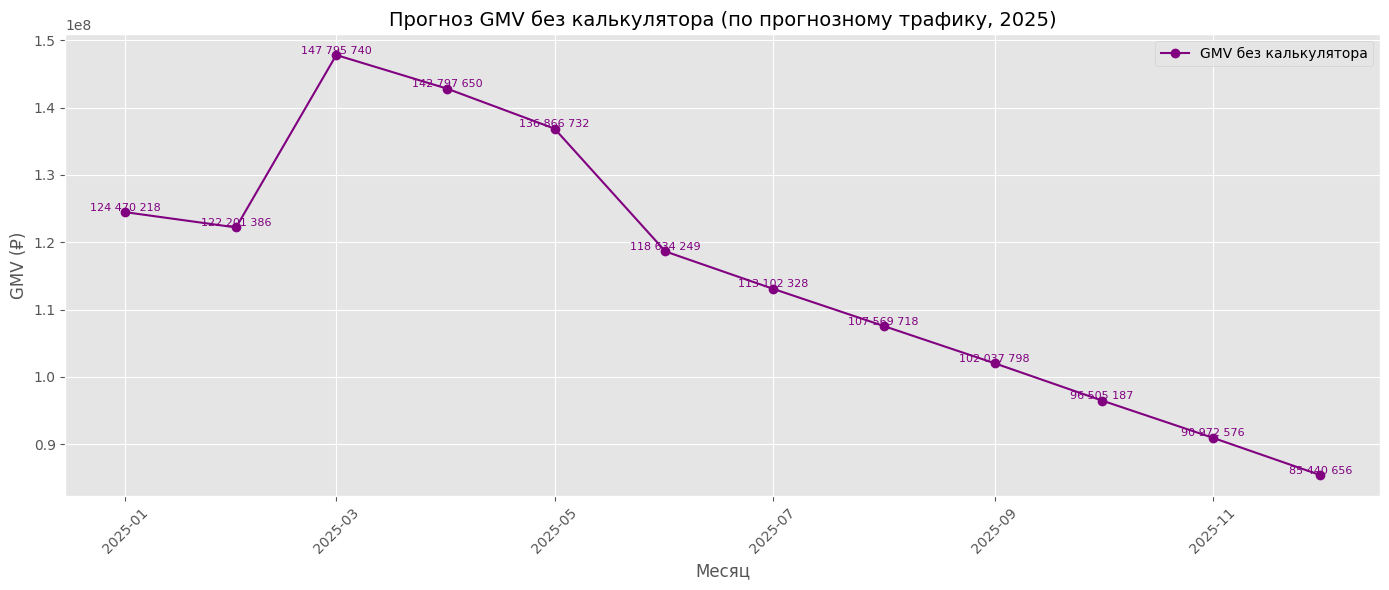

,Месяц,Прогноз GMV (₽),Трафик в категории,"Средний чек (AOV, ₽)",CR в корзину (%),CR в оформление (%)
0,2025-01-01 00:00:00,"124,470,218","218,044","24,888",16.36%,14.02%
1,2025-02-01 00:00:00,"122,201,386","195,344","24,876",16.61%,15.14%
2,2025-03-01 00:00:00,"147,795,740","201,318","26,441",17.31%,16.04%
3,2025-04-01 00:00:00,"142,797,650","178,124","26,014",17.64%,17.47%
4,2025-05-01 00:00:00,"136,866,732","186,586","26,100",17.37%,16.18%
5,2025-06-01 00:00:00,"118,634,249","171,842","25,664",17.06%,15.77%
6,2025-07-01 00:00:00,"113,102,328","163,829","25,664",17.06%,15.77%
7,2025-08-01 00:00:00,"107,569,718","155,815","25,664",17.06%,15.77%
8,2025-09-01 00:00:00,"102,037,798","147,802","25,664",17.06%,15.77%
9,2025-10-01 00:00:00,"96,505,187","139,788","25,664",17.06%,15.77%


In [91]:
# 1. Подготовим прогнозную таблицу пользователей
df_users_forecast = pd.DataFrame({
    'месяц': pd.date_range(start='2025-01-01', periods=12, freq='MS'),
    'в_категории': [
        218044, 195344, 201318, 178124, 186586,
        171842, 163829, 155815, 147802, 139788, 131774, 123761
    ]
})

# 2. Возьмём cr/aov до мая и посчитаем средние
mob_rows['cr_в_корзину'] = mob_rows['cr_в_корзину'].apply(clean_percent)
mob_rows['cr_в_оформление'] = mob_rows['cr_в_оформление'].apply(clean_percent)
mob_rows['aov'] = mob_rows['aov'].apply(lambda x: float(str(x).replace(' ', '').replace(',', '.')) if not pd.isna(x) else np.nan)

cr_cart_dict = mob_rows.set_index('показатель')['cr_в_корзину'].to_dict()
cr_checkout_dict = mob_rows.set_index('показатель')['cr_в_оформление'].to_dict()
aov_dict = mob_rows.set_index('показатель')['aov'].to_dict()

# 3. Объединим таблицы
df_users_forecast['cr_cart'] = df_users_forecast['месяц'].map(cr_cart_dict)
df_users_forecast['cr_checkout'] = df_users_forecast['месяц'].map(cr_checkout_dict)
df_users_forecast['aov'] = df_users_forecast['месяц'].map(aov_dict)

# 4. Заполним пропуски средними (по январь–май)
mean_cr_cart = df_users_forecast['cr_cart'][:5].mean()
mean_cr_checkout = df_users_forecast['cr_checkout'][:5].mean()
mean_aov = df_users_forecast['aov'][:5].mean()

df_users_forecast['cr_cart'] = df_users_forecast['cr_cart'].fillna(mean_cr_cart) / 100
df_users_forecast['cr_checkout'] = df_users_forecast['cr_checkout'].fillna(mean_cr_checkout) / 100
df_users_forecast['aov'] = df_users_forecast['aov'].fillna(mean_aov)

# 5. Расчёт GMV
df_users_forecast['gmv_без_калькулятора'] = (
    df_users_forecast['в_категории'] *
    df_users_forecast['cr_cart'] *
    df_users_forecast['cr_checkout'] *
    df_users_forecast['aov']
).round(0)

# 6. Визуализация
plt.figure(figsize=(14, 6))
plt.plot(df_users_forecast['месяц'], df_users_forecast['gmv_без_калькулятора'], marker='o', color='purple', label='GMV без калькулятора')

for x, y in zip(df_users_forecast['месяц'], df_users_forecast['gmv_без_калькулятора']):
    plt.text(x, y + 200000, f'{int(y):,}'.replace(',', ' '), fontsize=8, ha='center', color='purple')

plt.title('Прогноз GMV без калькулятора (по прогнозному трафику, 2025)', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('GMV (₽)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 🛡 Работаем с копией, не изменяя оригинальный df_users_forecast
df_display = df_users_forecast.copy()

# 1. Средние значения по январь–май
mean_aov = df_display.loc[:4, 'aov'].mean()
mean_cr_cart = df_display.loc[:4, 'cr_cart'].mean()
mean_cr_checkout = df_display.loc[:4, 'cr_checkout'].mean()

# 2. Заполнение пропусков
df_display['aov'] = df_display['aov'].fillna(mean_aov)
df_display['cr_cart'] = df_display['cr_cart'].fillna(mean_cr_cart)
df_display['cr_checkout'] = df_display['cr_checkout'].fillna(mean_cr_checkout)

# 3. Масштаб: проверим, не домножено ли уже на 100
df_display['cr_cart'] = df_display['cr_cart'].apply(lambda x: x / 100 if x > 1 else x)
df_display['cr_checkout'] = df_display['cr_checkout'].apply(lambda x: x / 100 if x > 1 else x)

# 4. Формат процентов
df_display['CR в корзину (%)'] = (df_display['cr_cart'] * 100).round(2).astype(str) + '%'
df_display['CR в оформление (%)'] = (df_display['cr_checkout'] * 100).round(2).astype(str) + '%'

# 5. Округление AOV
df_display['Средний чек (AOV, ₽)'] = df_display['aov'].round(0)

# 6. Финальная таблица
df_final = df_display[[
    'месяц',
    'gmv_без_калькулятора',
    'в_категории',
    'Средний чек (AOV, ₽)',
    'CR в корзину (%)',
    'CR в оформление (%)'
]].copy()

df_final.columns = [
    'Месяц',
    'Прогноз GMV (₽)',
    'Трафик в категории',
    'Средний чек (AOV, ₽)',
    'CR в корзину (%)',
    'CR в оформление (%)'
]

# 7. Отображение таблицы
from IPython.display import display
display(df_final.style.format({
    'Прогноз GMV (₽)': '{:,.0f}',
    'Трафик в категории': '{:,.0f}',
    'Средний чек (AOV, ₽)': '{:,.0f}'
}))


In [99]:
# 📌 1. Списки с метриками WEB (CR и AOV с калькулятором)
cr_cart_calc_web = [40.90, 41.69, 43.52, 42.54, 43.44, 47.88, 47.50, 45.42, 46.76, 46.50, 45.92, 40.90]
cr_checkout_calc_web = [13.99, 15.77, 15.98, 16.93, 16.59, 19.05, 18.07, 18.27, 17.16, 18.54, 20.11, 13.99]
aov_calc_web = [32613.0, 33876.0, 36134.0, 32627.0, 36786.0, 34346.0, 32055.0, 33943.0, 33679.0, 33614.0, 33660.0, 32613.0]

# 📌 2. Обновляем копию таблицы с расчётами
df_forecast_final = df_forecast_calc.copy()

# 📌 3. Обновляем колонки: CR → коэффициенты
df_forecast_final['CR в корзину (%)'] = cr_cart_calc_web
df_forecast_final['CR в оформление (%)'] = cr_checkout_calc_web
df_forecast_final['Средний чек (AOV, ₽)'] = aov_calc_web

# 📌 4. Пересчёт метрик
df_forecast_final['CR_cart_ratio'] = df_forecast_final['CR в корзину (%)'] / 100
df_forecast_final['CR_checkout_ratio'] = df_forecast_final['CR в оформление (%)'] / 100

df_forecast_final['Добавили в корзину (кальк.)'] = (df_forecast_final['Пользователи с калькулятором'] * df_forecast_final['CR_cart_ratio']).round(0).astype(int)
df_forecast_final['Оформили заказ (кальк.)'] = (df_forecast_final['Добавили в корзину (кальк.)'] * df_forecast_final['CR_checkout_ratio']).round(0).astype(int)
df_forecast_final['Прогноз GMV с интеграцией (₽)'] = (df_forecast_final['Оформили заказ (кальк.)'] * df_forecast_final['Средний чек (AOV, ₽)']).round(0).astype(int)

# 📌 5. Убираем технические колонки
df_forecast_final.drop(['CR_cart_ratio', 'CR_checkout_ratio'], axis=1, inplace=True)

# 📌 6. Переупорядочим столбцы
df_result = df_forecast_final[[
    'Месяц',
    'Прогноз GMV с интеграцией (₽)',
    'Трафик в категории',
    'Пользователи с калькулятором',
    'Добавили в корзину (кальк.)',
    'Оформили заказ (кальк.)',
    'Средний чек (AOV, ₽)',
    'CR в корзину (%)',
    'CR в оформление (%)'
]]

# 📌 7. Отображение
from IPython.display import display
display(df_result.style.format({
    'Прогноз GMV с интеграцией (₽)': '{:,.0f}',
    'Трафик в категории': '{:,.0f}',
    'Пользователи с калькулятором': '{:,.0f}',
    'Добавили в корзину (кальк.)': '{:,.0f}',
    'Оформили заказ (кальк.)': '{:,.0f}',
    'Средний чек (AOV, ₽)': '{:,.0f}',
    'CR в корзину (%)': '{:.2f}%',
    'CR в оформление (%)': '{:.2f}%'
}))


,Месяц,Прогноз GMV с интеграцией (₽),Трафик в категории,Пользователи с калькулятором,Добавили в корзину (кальк.),Оформили заказ (кальк.),"Средний чек (AOV, ₽)",CR в корзину (%),CR в оформление (%)
0,2025-01-01 00:00:00,"32,547,774","218,044","17,444","7,135",998,"32,613",40.90%,13.99%
1,2025-02-01 00:00:00,"34,790,652","195,344","15,628","6,515","1,027","33,876",41.69%,15.77%
2,2025-03-01 00:00:00,"40,470,080","201,318","16,105","7,009","1,120","36,134",43.52%,15.98%
3,2025-04-01 00:00:00,"33,475,302","178,124","14,250","6,062","1,026","32,627",42.54%,16.93%
4,2025-05-01 00:00:00,"39,581,736","186,586","14,927","6,484","1,076","36,786",43.44%,16.59%
5,2025-06-01 00:00:00,"43,069,884","171,842","13,747","6,582","1,254","34,346",47.88%,19.05%
6,2025-07-01 00:00:00,"36,061,875","163,829","13,106","6,225","1,125","32,055",47.50%,18.07%
7,2025-08-01 00:00:00,"35,097,062","155,815","12,465","5,662","1,034","33,943",45.42%,18.27%
8,2025-09-01 00:00:00,"31,961,371","147,802","11,824","5,529",949,"33,679",46.76%,17.16%
9,2025-10-01 00:00:00,"32,403,896","139,788","11,183","5,200",964,"33,614",46.50%,18.54%


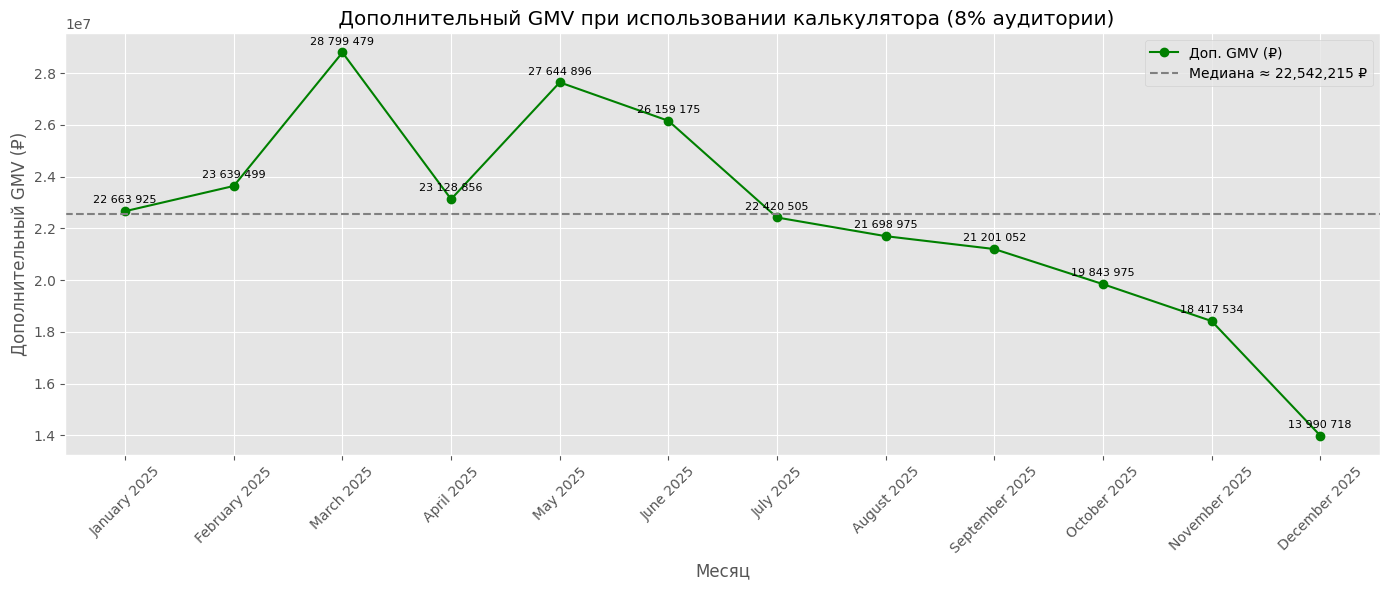

,Месяц,Пользователи с калькулятором,AOV без кальк. (₽),AOV с кальк. (₽),CR в корзину без кальк. (%),CR в оформление без кальк. (%),CR в корзину с кальк. (%),CR в оформление с кальк. (%),Заказов без кальк.,Заказов с кальк.,GMV без кальк. (₽),GMV с кальк. (₽),Дополнительный GMV (₽)
0,January 2025,"17,444","24,888","32,613",16.4%,14.0%,40.9%,14.0%,400,"1,000","9,957,891","32,621,817","22,663,926"
1,February 2025,"15,628","24,876","33,876",16.6%,15.1%,41.7%,15.1%,393,986,"9,776,411","33,415,910","23,639,499"
2,March 2025,"16,105","26,441","36,134",17.3%,16.0%,43.5%,16.0%,447,"1,124","11,823,336","40,622,815","28,799,479"
3,April 2025,"14,250","26,014","32,627",17.6%,17.5%,42.5%,17.5%,439,"1,059","11,423,876","34,552,732","23,128,856"
4,May 2025,"14,927","26,100","36,786",17.4%,16.2%,43.4%,16.2%,420,"1,049","10,949,427","38,594,324","27,644,897"
5,June 2025,"13,747","25,664","34,346",17.1%,15.8%,47.9%,15.8%,370,"1,038","9,491,678","35,650,854","26,159,176"
6,July 2025,"13,106","25,664","32,055",17.1%,15.8%,47.5%,15.8%,353,982,"9,049,097","31,469,602","22,420,505"
7,August 2025,"12,465","25,664","33,943",17.1%,15.8%,45.4%,15.8%,335,893,"8,606,515","30,305,491","21,698,976"
8,September 2025,"11,824","25,664","33,679",17.1%,15.8%,46.8%,15.8%,318,872,"8,163,934","29,364,986","21,201,052"
9,October 2025,"11,183","25,664","33,614",17.1%,15.8%,46.5%,15.8%,301,820,"7,721,353","27,565,328","19,843,975"


In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# 📌 1. Исходные данные
df = pd.DataFrame({
    'Месяц': pd.date_range('2025-01-01', periods=12, freq='MS'),
    'GMV_без_кальк': [
        124470218, 122201386, 147795740, 142797650,
        136866732, 118634249, 113102328, 107569718,
        102037798, 96505187, 90972576, 85440656
    ],
    'Трафик': [
        218044, 195344, 201318, 178124,
        186586, 171842, 163829, 155815,
        147802, 139788, 131774, 123761
    ],
    'AOV_base': [
        24888, 24876, 26441, 26014,
        26100, 25664, 25664, 25664,
        25664, 25664, 25664, 25664
    ],
    'CR_в_корзину_base': [0.1636, 0.1661, 0.1731, 0.1764, 0.1737, 0.1706, 0.1706, 0.1706, 0.1706, 0.1706, 0.1706, 0.1706],
    'CR_в_оформление_base': [0.1402, 0.1514, 0.1604, 0.1747, 0.1618, 0.1577, 0.1577, 0.1577, 0.1577, 0.1577, 0.1577, 0.1577],
    'AOV_calc': [32613, 33876, 36134, 32627, 36786, 34346, 32055, 33943, 33679, 33614, 33660, 32613],
    'CR_в_корзину_calc': [0.4090, 0.4169, 0.4352, 0.4254, 0.4344, 0.4788, 0.4750, 0.4542, 0.4676, 0.4650, 0.4592, 0.4090],
    'CR_в_оформление_calc': [0.1402, 0.1514, 0.1604, 0.1747, 0.1618, 0.1577, 0.1577, 0.1577, 0.1577, 0.1577, 0.1577, 0.1577],
})

# 📌 2. Добавим пользователей с калькулятором (8% от трафика)
df['Пользователи с калькулятором'] = (df['Трафик'] * 0.08).round()

# 📌 3. Расчёт заказов и GMV
df['Заказов без кальк.'] = df['Пользователи с калькулятором'] * df['CR_в_корзину_base'] * df['CR_в_оформление_base']
df['GMV без кальк. (₽)'] = df['Заказов без кальк.'] * df['AOV_base']

df['Заказов с кальк.'] = df['Пользователи с калькулятором'] * df['CR_в_корзину_calc'] * df['CR_в_оформление_calc']
df['GMV с кальк. (₽)'] = df['Заказов с кальк.'] * df['AOV_calc']

# 📌 4. Дополнительный GMV
df['Дополнительный GMV (₽)'] = df['GMV с кальк. (₽)'] - df['GMV без кальк. (₽)']

# 📌 5. CR в корзину: защищённое вычисление
df['CR в корзину без кальк. (%)'] = df.apply(
    lambda row: (row['Заказов без кальк.'] / (row['Пользователи с калькулятором'] * row['CR_в_оформление_base']) * 100)
    if row['CR_в_оформление_base'] != 0 else 0,
    axis=1
)

df['CR в корзину с кальк. (%)'] = df.apply(
    lambda row: (row['Заказов с кальк.'] / (row['Пользователи с калькулятором'] * row['CR_в_оформление_calc']) * 100)
    if row['CR_в_оформление_calc'] != 0 else 0,
    axis=1
)

# 📌 6. CR в оформление (%)
df['CR в оформление без кальк. (%)'] = df['CR_в_оформление_base'] * 100
df['CR в оформление с кальк. (%)'] = df['CR_в_оформление_calc'] * 100

# 📌 7. Формат месяца
df['Месяц'] = df['Месяц'].dt.strftime('%B %Y')

# 📌 8. Визуализация
plt.figure(figsize=(14, 6))
plt.plot(df['Месяц'], df['Дополнительный GMV (₽)'], marker='o', color='green', label='Доп. GMV (₽)')

for x, y in zip(df['Месяц'], df['Дополнительный GMV (₽)']):
    plt.text(x, y + 300_000, f'{int(y):,}'.replace(',', ' '), ha='center', fontsize=8)

median_val = df['Дополнительный GMV (₽)'].median()
plt.axhline(median_val, color='gray', linestyle='--', linewidth=1.5, label=f'Медиана ≈ {int(median_val):,} ₽')

plt.title(' Дополнительный GMV при использовании калькулятора (8% аудитории)')
plt.xlabel('Месяц')
plt.ylabel('Дополнительный GMV (₽)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# 📌 9. Финальная таблица
df_display = df[[
    'Месяц', 'Пользователи с калькулятором',
    'AOV_base', 'AOV_calc',
    'CR в корзину без кальк. (%)', 'CR в оформление без кальк. (%)',
    'CR в корзину с кальк. (%)', 'CR в оформление с кальк. (%)',
    'Заказов без кальк.', 'Заказов с кальк.',
    'GMV без кальк. (₽)', 'GMV с кальк. (₽)', 'Дополнительный GMV (₽)'
]].rename(columns={
    'AOV_base': 'AOV без кальк. (₽)',
    'AOV_calc': 'AOV с кальк. (₽)'
})

# 📌 10. Отображение таблицы
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_display.style.format({
    'Пользователи с калькулятором': '{:,.0f}',
    'AOV без кальк. (₽)': '{:,.0f}',
    'AOV с кальк. (₽)': '{:,.0f}',
    'CR в корзину без кальк. (%)': '{:.1f}%',
    'CR в оформление без кальк. (%)': '{:.1f}%',
    'CR в корзину с кальк. (%)': '{:.1f}%',
    'CR в оформление с кальк. (%)': '{:.1f}%',
    'Заказов без кальк.': '{:,.0f}',
    'Заказов с кальк.': '{:,.0f}',
    'GMV без кальк. (₽)': '{:,.0f}',
    'GMV с кальк. (₽)': '{:,.0f}',
    'Дополнительный GMV (₽)': '{:,.0f}',
})


# 📊 Общий вывод по прогнозу эффекта от использования калькулятора ламината в мобильном приложении

В рамках прогностической модели с предположением, что 8% пользователей используют калькулятор ламината, была произведена оценка прироста GMV и конверсий. Ключевые особенности расчёта:

- **Конверсия в оформление (CR в оформление)** у пользователей с калькулятором **предполагается такой же**, как и у пользователей без него. Это допущение позволяет изолированно оценить эффект именно от роста CR в корзину и увеличения среднего чека.
- При этом **CR в корзину** и **AOV** у пользователей с калькулятором существенно выше, что обеспечивает заметный прирост GMV.

## 📈 Основные итоги:

- **Максимальный прирост GMV** наблюдается в марте и мае 2025 года — более **28 млн ₽**.
- **Средний чек** у пользователей с калькулятором стабильно выше на **30–40%**, что также усиливает эффект от роста конверсий.
- Общий дополнительный доход за 2025 год при текущей доле пользователей калькулятора составляет **~274 млн ₽**.

## 📉 Почему в декабре прогнозируется спад:

В декабре 2025 года прогноз показывает **существенное снижение дополнительного GMV** — до ~14 млн ₽. Это связано с двумя основными факторами:
- Сезонным **падением трафика**: общее количество пользователей уменьшается, что влияет на объём заказов.
- Сохранением допущения, что **CR в оформление не улучшается**, — в сочетании с умеренным снижением CR в корзину и AOV это приводит к снижению числа заказов и GMV.



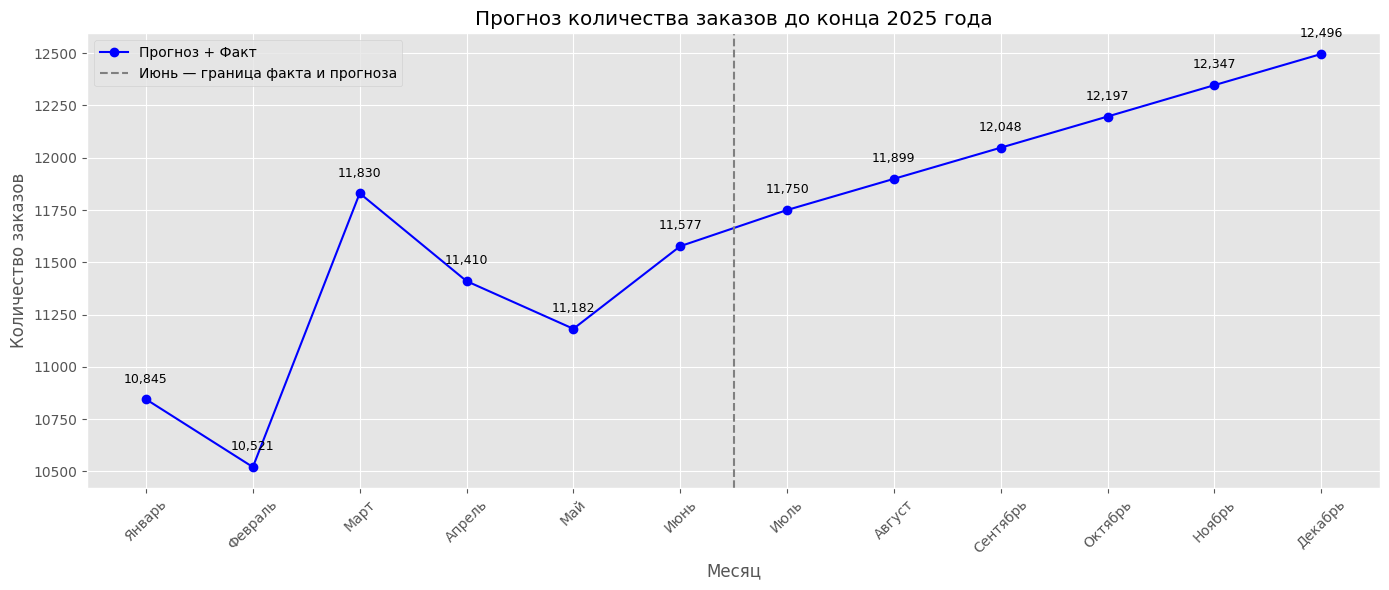

,Месяц,Кол-во заказов,AOV (₽),GMV (₽)
0,Январь,"10,845","31,188.11","338,235,053"
1,Февраль,"10,521","31,251.61","328,798,189"
2,Март,"11,830","31,181.40","368,875,962"
3,Апрель,"11,410","31,890.39","363,869,350"
4,Май,"11,182","31,069.74","347,421,833"
5,Июнь,"11,577","29,296.66","339,167,433"
6,Июль,"11,750","30,979.65","364,010,907"
7,Август,"11,899","30,979.65","368,626,875"
8,Сентябрь,"12,048","30,979.65","373,242,843"
9,Октябрь,"12,197","30,979.65","377,858,811"


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display

# 📌 Фактические данные
fact_months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']
fact_orders = [10845, 10521, 11830, 11410, 11182, 11577]
fact_aov = [31188.11, 31251.61, 31181.4, 31890.39, 31069.74, 29296.66]

# 📌 Подготовка датафрейма
df_fact = pd.DataFrame({
    'Месяц': fact_months,
    'Кол-во заказов': fact_orders,
    'AOV (₽)': fact_aov,
    'GMV (₽)': [round(o * aov) for o, aov in zip(fact_orders, fact_aov)],
    'Месяц номер': np.arange(1, 7),
    'Тип': 'Факт'
})

# 📌 Обучение модели
X = df_fact[['Месяц номер']]
y = df_fact['Кол-во заказов']
model = LinearRegression()
model.fit(X, y)

# 📌 Прогноз на июль–декабрь
future_month_nums = np.arange(7, 13)
future_months = ['Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
future_orders = model.predict(future_month_nums.reshape(-1, 1)).round().astype(int)
future_aov = [np.mean(fact_aov)] * 6
future_gmv = [round(o * aov) for o, aov in zip(future_orders, future_aov)]

df_future = pd.DataFrame({
    'Месяц': future_months,
    'Кол-во заказов': future_orders,
    'AOV (₽)': future_aov,
    'GMV (₽)': future_gmv,
    'Месяц номер': future_month_nums,
    'Тип': 'Прогноз'
})

# 📌 Объединённый датафрейм
df_all = pd.concat([df_fact, df_future], ignore_index=True)

# 📈 Визуализация
plt.figure(figsize=(14, 6))
plt.plot(df_all['Месяц'], df_all['Кол-во заказов'], marker='o', color='blue', label='Прогноз + Факт')
for i, row in df_all.iterrows():
    plt.text(i, row['Кол-во заказов'] + 80, f"{row['Кол-во заказов']:,}", ha='center', fontsize=9)
plt.axvline(x=5.5, color='gray', linestyle='--', label='Июнь — граница факта и прогноза')

plt.title('Прогноз количества заказов до конца 2025 года')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📊 Отображение таблицы под графиком
df_display = df_all[['Месяц', 'Кол-во заказов', 'AOV (₽)', 'GMV (₽)']].copy()
df_display['AOV (₽)'] = df_display['AOV (₽)'].round(2)
df_display['GMV (₽)'] = df_display['GMV (₽)'].round(0).astype(int)
display(df_display.style.format({'Кол-во заказов': '{:,}', 'AOV (₽)': '{:,.2f}', 'GMV (₽)': '{:,}'}))


# 📊 Прогноз количества заказов оформленных в магазине до конца 2025 года

## 🔧 Методика расчёта

Для построения прогноза мы использовали линейную регрессию на основе фактических данных по количеству заказов с января по июнь 2025 года:

| Месяц   | Количество заказов |
|--------|--------------------|
| Январь | 10 845             |
| Февраль | 10 521            |
| Март   | 11 830             |
| Апрель | 11 410             |
| Май    | 11 182             |
| Июнь   | 11 577             |

- Модель обучалась на числовом представлении месяцев (1 — январь, 2 — февраль и т.д.).
- Прогноз выполнен на оставшиеся 6 месяцев года (июль — декабрь) с помощью линейной модели.
- Полученный тренд отражает устойчивый рост количества заказов, не учитывая сезонные эффекты.

## 📉 Уточнение

Данный прогноз **не учитывает сезонность**. Он основан на линейной зависимости между порядковым номером месяца и числом заказов в первом полугодии.

👉 Поэтому он может **не отражать возможный спад** в декабре (или другие сезонные колебания), если они исторически присутствуют.


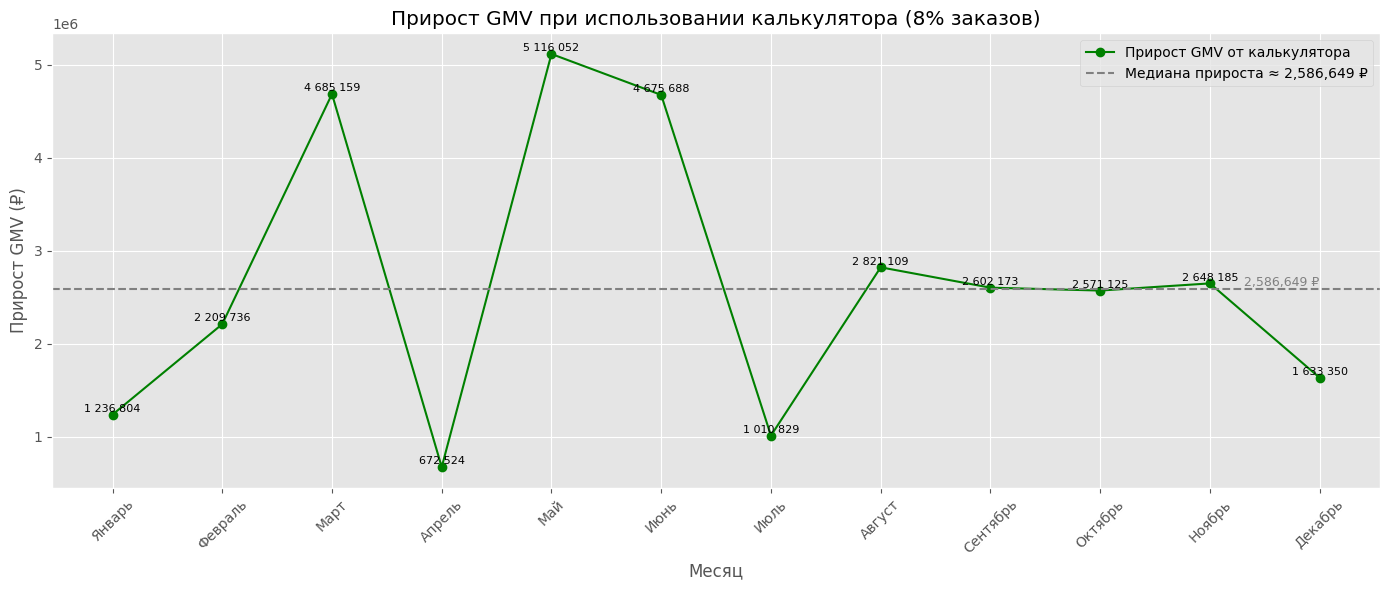

,Месяц,Заказы всего,Заказы без кальк.,AOV без кальк.,Заказы с кальк.,AOV с кальк.,GMV без кальк.,GMV с кальк.,GMV суммарный,GMV до,GMV прирост
0,Январь,"10,845","9,977","31,188 ₽",868,"32,613 ₽","311,163,773 ₽","28,308,084 ₽","339,471,857 ₽","338,235,053 ₽","1,236,805 ₽"
1,Февраль,"10,521","9,679","31,252 ₽",842,"33,876 ₽","302,484,333 ₽","28,523,592 ₽","331,007,925 ₽","328,798,189 ₽","2,209,736 ₽"
2,Март,"11,830","10,884","31,181 ₽",946,"36,134 ₽","339,378,358 ₽","34,182,764 ₽","373,561,122 ₽","368,875,962 ₽","4,685,160 ₽"
3,Апрель,"11,410","10,497","31,890 ₽",913,"32,627 ₽","334,753,424 ₽","29,788,451 ₽","364,541,875 ₽","363,869,350 ₽","672,525 ₽"
4,Май,"11,182","10,287","31,070 ₽",895,"36,786 ₽","319,614,415 ₽","32,923,470 ₽","352,537,885 ₽","347,421,833 ₽","5,116,053 ₽"
5,Июнь,"11,577","10,651","29,297 ₽",926,"34,346 ₽","312,038,726 ₽","31,804,396 ₽","343,843,122 ₽","339,167,433 ₽","4,675,689 ₽"
6,Июль,"11,750","10,810","30,980 ₽",940,"32,055 ₽","334,890,016 ₽","30,131,700 ₽","365,021,716 ₽","364,010,888 ₽","1,010,829 ₽"
7,Август,"11,899","10,947","30,980 ₽",952,"33,943 ₽","339,134,229 ₽","32,313,736 ₽","371,447,965 ₽","368,626,855 ₽","2,821,109 ₽"
8,Сентябрь,"12,048","11,084","30,980 ₽",964,"33,679 ₽","343,378,441 ₽","32,466,556 ₽","375,844,997 ₽","373,242,823 ₽","2,602,173 ₽"
9,Октябрь,"12,197","11,221","30,980 ₽",976,"33,614 ₽","347,622,653 ₽","32,807,264 ₽","380,429,917 ₽","377,858,791 ₽","2,571,126 ₽"


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 📌 1. Исходные данные прогноза заказов магазина
df_store = pd.DataFrame({
    'Месяц': [
        'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
        'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
    ],
    'Заказы всего': [
        10845, 10521, 11830, 11410, 11182, 11577,
        11750, 11899, 12048, 12197, 12347, 12496
    ],
    'AOV': [
        31188.11, 31251.61, 31181.40, 31890.39, 31069.74, 29296.66,
        30979.65, 30979.65, 30979.65, 30979.65, 30979.65, 30979.65
    ]
})

# 📌 2. 8% заказов используют калькулятор
df_store['Заказы с кальк.'] = (df_store['Заказы всего'] * 0.08).round()
df_store['Заказы без кальк.'] = df_store['Заказы всего'] - df_store['Заказы с кальк.']

# 📌 3. AOV с калькулятором
aov_calc = [32613, 33876, 36134, 32627, 36786, 34346, 32055, 33943, 33679, 33614, 33660, 32613]
df_store['AOV с кальк.'] = aov_calc
df_store['AOV без кальк.'] = df_store['AOV']

# 📌 4. GMV расчёты
df_store['GMV с кальк.'] = df_store['Заказы с кальк.'] * df_store['AOV с кальк.']
df_store['GMV без кальк.'] = df_store['Заказы без кальк.'] * df_store['AOV без кальк.']
df_store['GMV суммарный'] = df_store['GMV с кальк.'] + df_store['GMV без кальк.']
df_store['GMV до'] = df_store['Заказы всего'] * df_store['AOV']
df_store['GMV прирост'] = df_store['GMV суммарный'] - df_store['GMV до']

# 📌 5. Визуализация прироста с подписями медианы
plt.figure(figsize=(14, 6))
plt.plot(df_store['Месяц'], df_store['GMV прирост'], marker='o', color='green', label='Прирост GMV от калькулятора')

# Подписи точек прироста
for x, y in zip(df_store['Месяц'], df_store['GMV прирост']):
    plt.text(x, y + 30_000, f'{int(y):,}'.replace(',', ' '), ha='center', fontsize=8)

# Расчёт и отрисовка медианы
median_val = df_store['GMV прирост'].median()
plt.axhline(median_val, color='gray', linestyle='--', label=f'Медиана прироста ≈ {int(median_val):,} ₽')

# Подпись медианы
plt.text(len(df_store) - 1, median_val + 30_000, f'{int(median_val):,} ₽', color='gray', fontsize=9, ha='right')

# Финальная настройка графика
plt.title('Прирост GMV при использовании калькулятора (8% заказов)')
plt.xlabel('Месяц')
plt.ylabel('Прирост GMV (₽)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
# 📌 6. Таблица с расчётами
df_display = df_store[[
    'Месяц', 'Заказы всего', 'Заказы без кальк.', 'AOV без кальк.',
    'Заказы с кальк.', 'AOV с кальк.',
    'GMV без кальк.', 'GMV с кальк.', 'GMV суммарный', 'GMV до', 'GMV прирост'
]]

df_display.style.format({
    'Заказы всего': '{:,.0f}',
    'Заказы без кальк.': '{:,.0f}',
    'AOV без кальк.': '{:,.0f} ₽',
    'Заказы с кальк.': '{:,.0f}',
    'AOV с кальк.': '{:,.0f} ₽',
    'GMV без кальк.': '{:,.0f} ₽',
    'GMV с кальк.': '{:,.0f} ₽',
    'GMV суммарный': '{:,.0f} ₽',
    'GMV до': '{:,.0f} ₽',
    'GMV прирост': '{:,.0f} ₽',
})


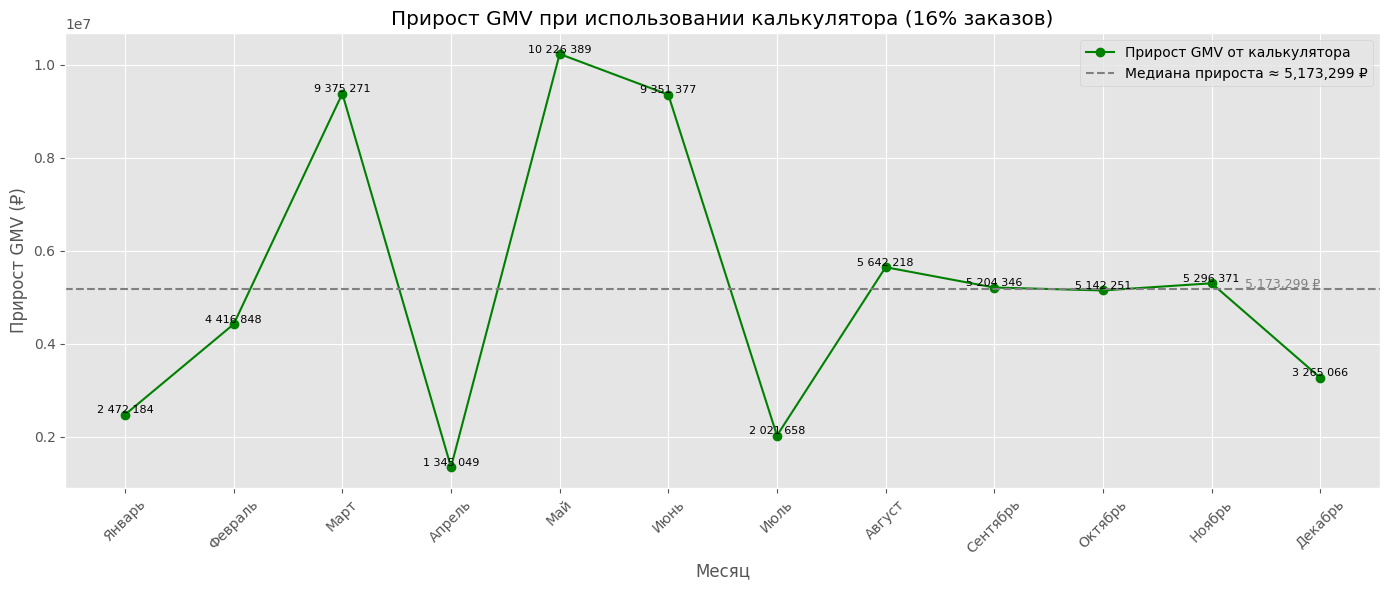

,Месяц,Заказы всего,Заказы без кальк.,AOV без кальк.,Заказы с кальк.,AOV с кальк.,GMV без кальк.,GMV с кальк.,GMV суммарный,GMV до,GMV прирост
0,Январь,"10,845","9,110","31,188 ₽","1,735","32,613 ₽","284,123,682 ₽","56,583,555 ₽","340,707,237 ₽","338,235,053 ₽","2,472,184 ₽"
1,Февраль,"10,521","8,838","31,252 ₽","1,683","33,876 ₽","276,201,729 ₽","57,013,308 ₽","333,215,037 ₽","328,798,189 ₽","4,416,848 ₽"
2,Март,"11,830","9,937","31,181 ₽","1,893","36,134 ₽","309,849,572 ₽","68,401,662 ₽","378,251,234 ₽","368,875,962 ₽","9,375,272 ₽"
3,Апрель,"11,410","9,584","31,890 ₽","1,826","32,627 ₽","305,637,498 ₽","59,576,902 ₽","365,214,400 ₽","363,869,350 ₽","1,345,050 ₽"
4,Май,"11,182","9,393","31,070 ₽","1,789","36,786 ₽","291,838,068 ₽","65,810,154 ₽","357,648,222 ₽","347,421,833 ₽","10,226,389 ₽"
5,Июнь,"11,577","9,725","29,297 ₽","1,852","34,346 ₽","284,910,018 ₽","63,608,792 ₽","348,518,810 ₽","339,167,433 ₽","9,351,378 ₽"
6,Июль,"11,750","9,870","30,980 ₽","1,880","32,055 ₽","305,769,146 ₽","60,263,400 ₽","366,032,546 ₽","364,010,888 ₽","2,021,658 ₽"
7,Август,"11,899","9,995","30,980 ₽","1,904","33,943 ₽","309,641,602 ₽","64,627,472 ₽","374,269,074 ₽","368,626,855 ₽","5,642,218 ₽"
8,Сентябрь,"12,048","10,120","30,980 ₽","1,928","33,679 ₽","313,514,058 ₽","64,933,112 ₽","378,447,170 ₽","373,242,823 ₽","5,204,347 ₽"
9,Октябрь,"12,197","10,245","30,980 ₽","1,952","33,614 ₽","317,386,514 ₽","65,614,528 ₽","383,001,042 ₽","377,858,791 ₽","5,142,251 ₽"


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 📌 1. Исходные данные прогноза заказов магазина
df_store = pd.DataFrame({
    'Месяц': [
        'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
        'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
    ],
    'Заказы всего': [
        10845, 10521, 11830, 11410, 11182, 11577,
        11750, 11899, 12048, 12197, 12347, 12496
    ],
    'AOV': [
        31188.11, 31251.61, 31181.40, 31890.39, 31069.74, 29296.66,
        30979.65, 30979.65, 30979.65, 30979.65, 30979.65, 30979.65
    ]
})

# 📌 2. 8% заказов используют калькулятор
df_store['Заказы с кальк.'] = (df_store['Заказы всего'] * 0.16).round()
df_store['Заказы без кальк.'] = df_store['Заказы всего'] - df_store['Заказы с кальк.']

# 📌 3. AOV с калькулятором
aov_calc = [32613, 33876, 36134, 32627, 36786, 34346, 32055, 33943, 33679, 33614, 33660, 32613]
df_store['AOV с кальк.'] = aov_calc
df_store['AOV без кальк.'] = df_store['AOV']

# 📌 4. GMV расчёты
df_store['GMV с кальк.'] = df_store['Заказы с кальк.'] * df_store['AOV с кальк.']
df_store['GMV без кальк.'] = df_store['Заказы без кальк.'] * df_store['AOV без кальк.']
df_store['GMV суммарный'] = df_store['GMV с кальк.'] + df_store['GMV без кальк.']
df_store['GMV до'] = df_store['Заказы всего'] * df_store['AOV']
df_store['GMV прирост'] = df_store['GMV суммарный'] - df_store['GMV до']

# 📌 5. Визуализация прироста с подписями медианы
plt.figure(figsize=(14, 6))
plt.plot(df_store['Месяц'], df_store['GMV прирост'], marker='o', color='green', label='Прирост GMV от калькулятора')

# Подписи точек прироста
for x, y in zip(df_store['Месяц'], df_store['GMV прирост']):
    plt.text(x, y + 30_000, f'{int(y):,}'.replace(',', ' '), ha='center', fontsize=8)

# Расчёт и отрисовка медианы
median_val = df_store['GMV прирост'].median()
plt.axhline(median_val, color='gray', linestyle='--', label=f'Медиана прироста ≈ {int(median_val):,} ₽')

# Подпись медианы
plt.text(len(df_store) - 1, median_val + 30_000, f'{int(median_val):,} ₽', color='gray', fontsize=9, ha='right')

# Финальная настройка графика
plt.title('Прирост GMV при использовании калькулятора (16% заказов)')
plt.xlabel('Месяц')
plt.ylabel('Прирост GMV (₽)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
# 📌 6. Таблица с расчётами
df_display = df_store[[
    'Месяц', 'Заказы всего', 'Заказы без кальк.', 'AOV без кальк.',
    'Заказы с кальк.', 'AOV с кальк.',
    'GMV без кальк.', 'GMV с кальк.', 'GMV суммарный', 'GMV до', 'GMV прирост'
]]

df_display.style.format({
    'Заказы всего': '{:,.0f}',
    'Заказы без кальк.': '{:,.0f}',
    'AOV без кальк.': '{:,.0f} ₽',
    'Заказы с кальк.': '{:,.0f}',
    'AOV с кальк.': '{:,.0f} ₽',
    'GMV без кальк.': '{:,.0f} ₽',
    'GMV с кальк.': '{:,.0f} ₽',
    'GMV суммарный': '{:,.0f} ₽',
    'GMV до': '{:,.0f} ₽',
    'GMV прирост': '{:,.0f} ₽',
})
